<a href="https://colab.research.google.com/github/ce3tnia/MachineLearning/blob/master/MachineLearning4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/MachineLearning/Iris.csv"
df = pd.read_csv(path)

In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:

# hapus atribut yang tidak digunakan
df.drop(['Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

## Bagi menjadi atribut dan label
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_test), len(x_train)

(30, 120)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbours = 15
# Create Model
model_knn = KNeighborsClassifier(n_neighbours)
# Training model
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
# Predict model
pred_knn = model_knn.predict(x_test)
# Evaluate using data test
accuracy = (pred_knn == y_test).sum()/len(y_test)
accuracy

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_knn, y_test)
cm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

# **Decision** **Tree**

[Text(148.8, 205.35999999999999, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [39, 41, 40]'),
 Text(111.60000000000001, 181.2, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(186.0, 181.2, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 81\nvalue = [0, 41, 40]'),
 Text(111.60000000000001, 157.04, 'X[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(74.4, 132.88, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(148.8, 132.88, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(260.40000000000003, 157.04, 'X[2] <= 5.15\nentropy = 0.511\nsamples = 44\nvalue = [0, 5, 39]'),
 Text(223.20000000000002, 132.88, 'X[3] <= 1.85\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(186.0, 108.72, 'X[1] <= 3.05\nentropy = 0.991\nsamples = 9\nvalue = [0, 5, 4]'),
 Text(148.8, 84.56, 'X[3] <= 1.75\nentropy = 0.985\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(111.60000000000001, 60.400000000000006, 'X[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 

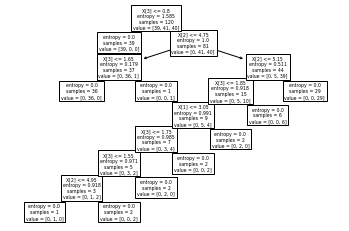

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Create model
model_tree = DecisionTreeClassifier(criterion='entropy')
# Training model
model_tree.fit(x_train, y_train)
# Tampilkan tree
tree.plot_tree(model_tree)

In [ ]:
# Predict model
pred_tree = model_tree.predict(x_test)
# Evaluate using data test
accuracy = (pred_tree == y_test).sum()/len(y_test)
accuracy

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_tree, y_test)
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]])

# **Naive** **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create Model
model_gnb = GaussianNB()
# Training model
model_gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predict model
pred_gnb = model_gnb.predict(x_test)
# Evaluate using data test
accuracy = (pred_gnb == y_test).sum()/len(y_test)
accuracy

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_gnb, y_test)
cm

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]])

# **Cross** **Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_knn, x, y, cv=5)
scores

array([0.93333333, 1.        , 0.93333333, 0.96666667, 1.        ])

In [ ]:
# Rata-rata
mean = scores.sum()/len(scores)
mean

0.9666666666666668